# Logistic Regression (Dry Bean Dataset)

###### Develop a machine learning model to classify different cultivars of dry beans based on features extracted from images. The primary objective of this project is to create an accurate classification model that can assist in automating the process of identifying and sorting dry beans by their cultivar type. By leveraging machine learning techniques, we aim to improve the efficiency and accuracy of bean classification, which is traditionally done manually by experts.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
ab=pd.read_excel("Dry_Bean_Dataset.xlsx")
ab

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
ab.shape

(13611, 17)

In [5]:
ab.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [6]:
ab.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [7]:
ab.duplicated().sum()

68

In [8]:
ab.drop_duplicates(inplace=True)

In [9]:
ab

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [10]:
ab.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
ab["Class"]=lab.fit_transform(ab["Class"])
ab

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


### Checking of Skewness

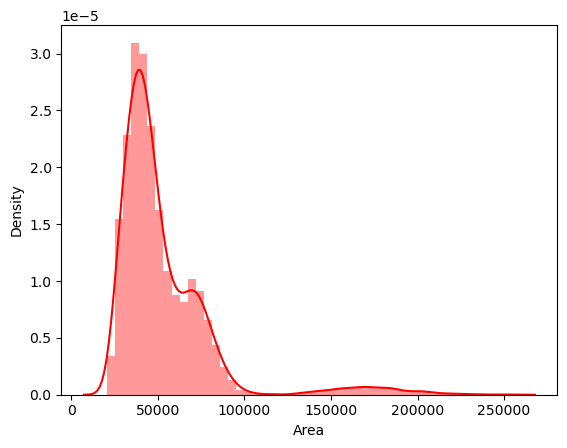

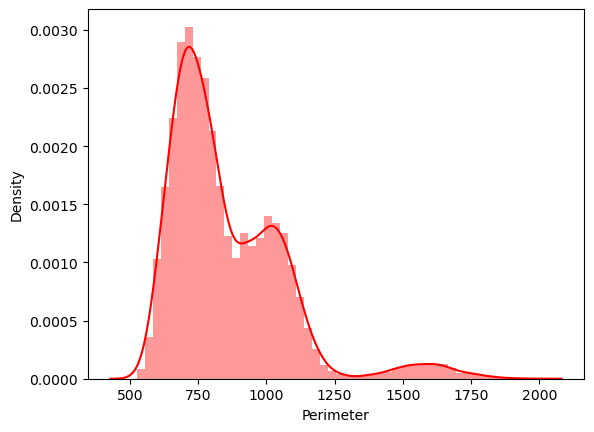

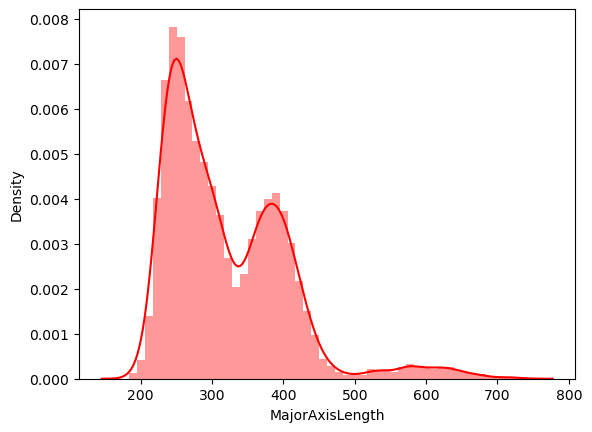

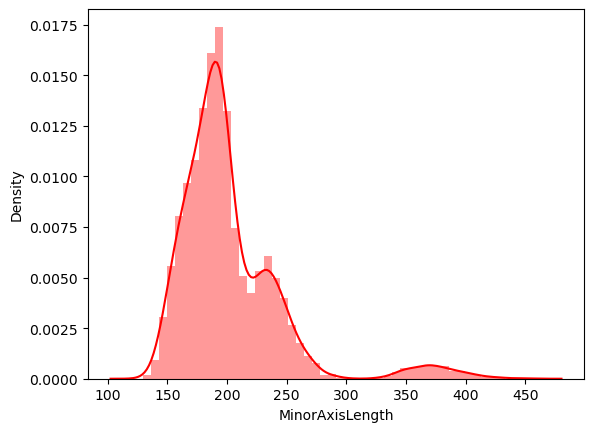

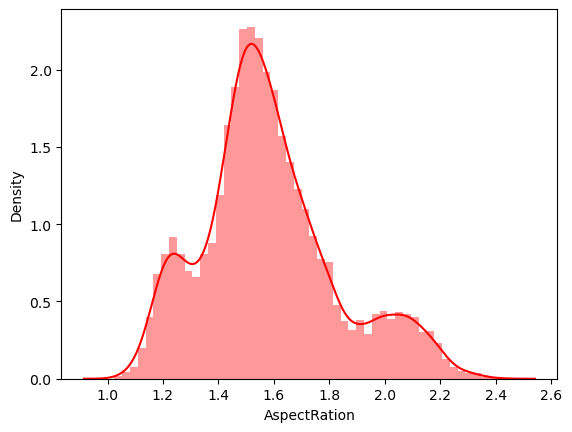

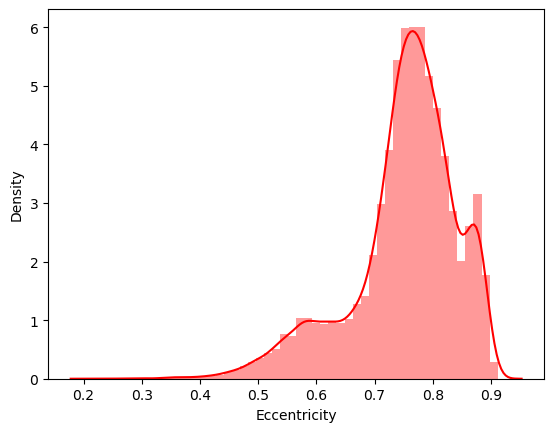

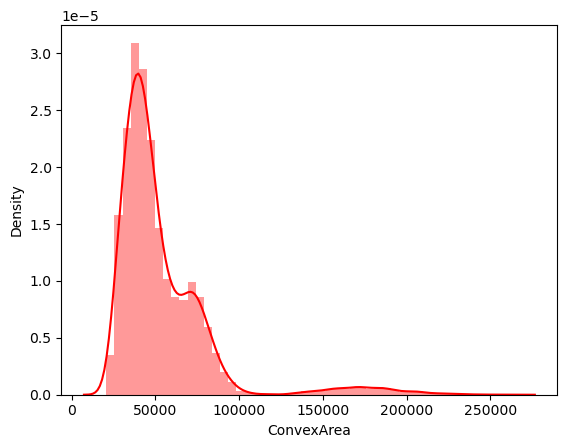

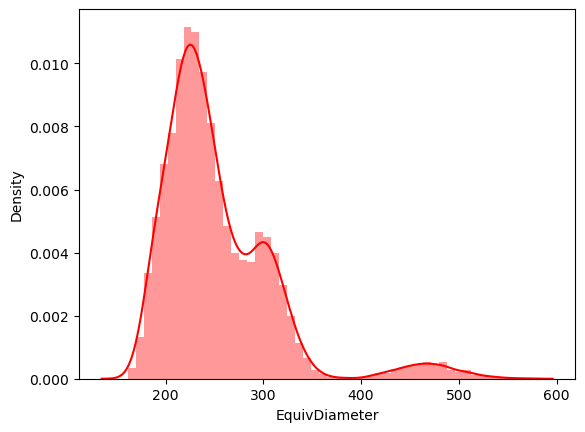

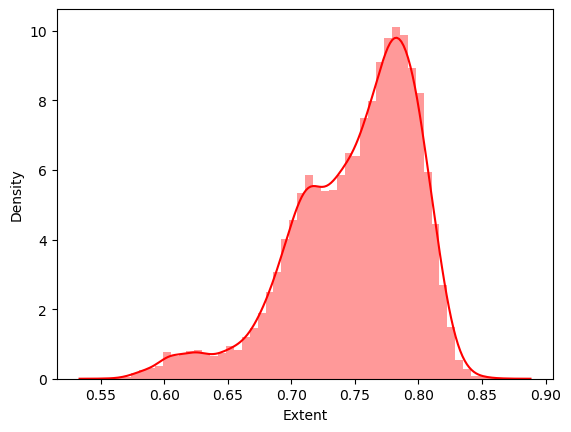

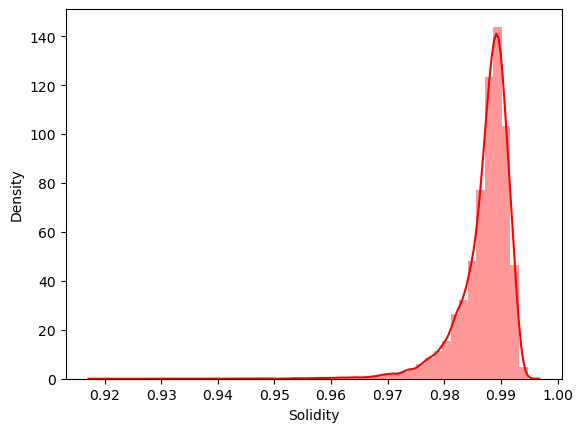

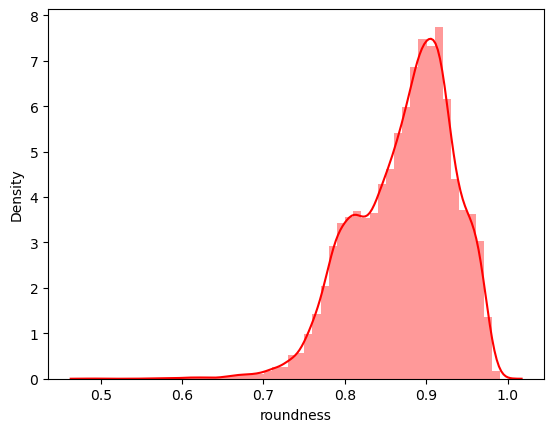

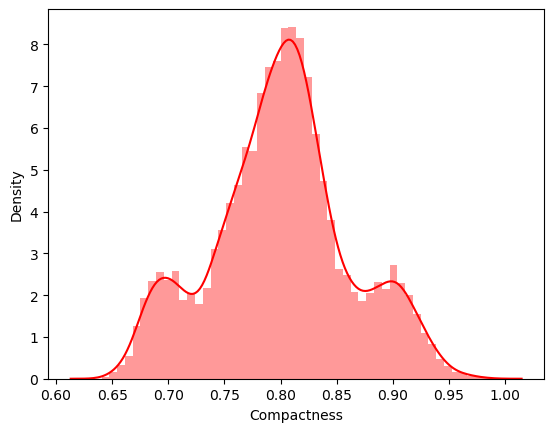

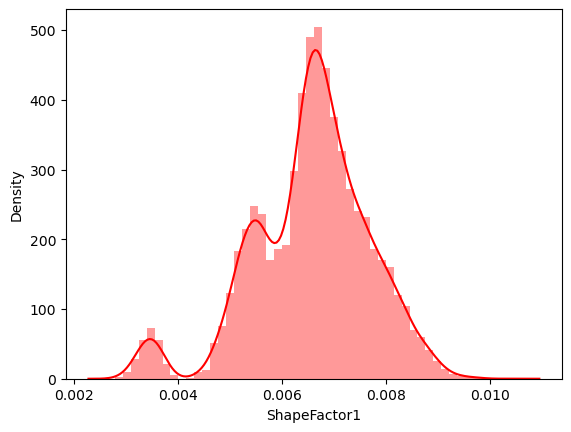

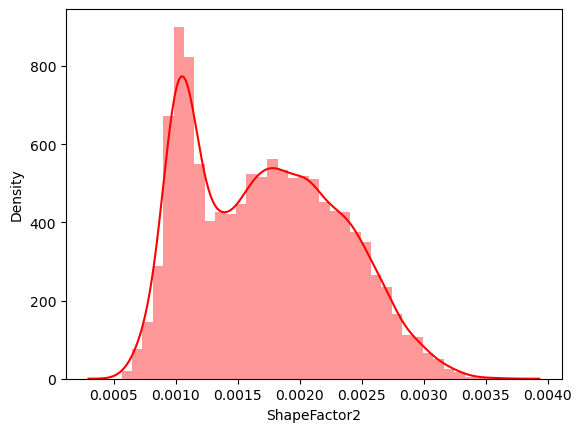

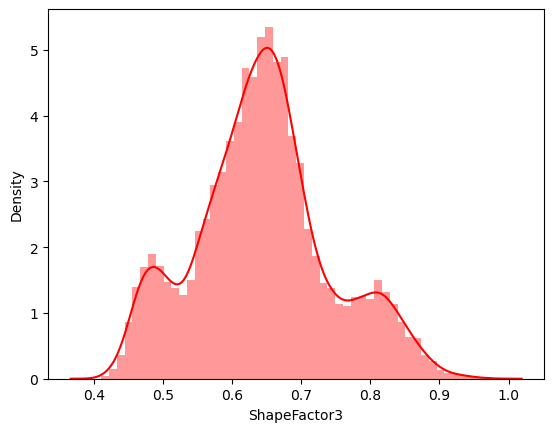

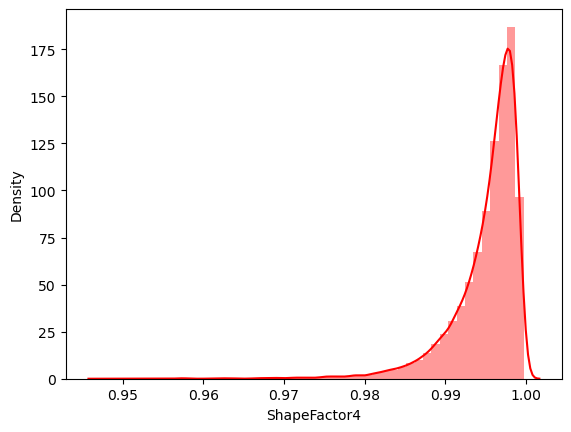

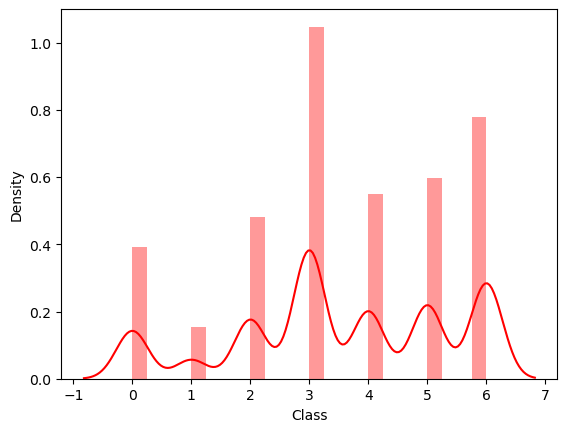

In [12]:
for i in ab.columns:
    sns.distplot(ab[i],color="red")
    plt.show()

In [13]:
ab["Class"].value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

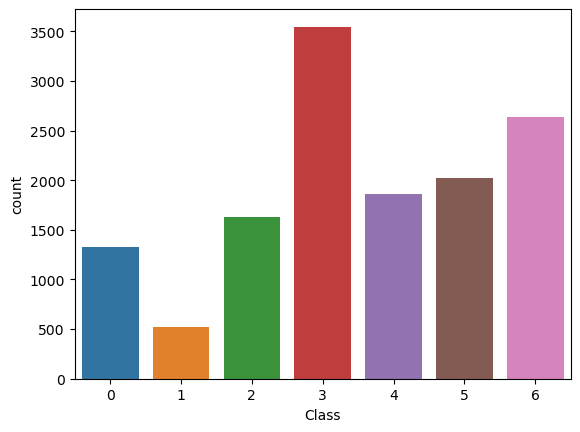

In [14]:
sns.countplot(data=ab,x="Class")

## Vif

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame({"variables":ab.columns})
vif["vif"]=[variance_inflation_factor(ab.values,ak)
           for ak in range(len(ab.columns))]
vif


,variables,vif
0,Area,3.465840e+05
1,Perimeter,6.075758e+04
2,MajorAxisLength,1.317641e+06
3,MinorAxisLength,1.653777e+06
4,AspectRation,1.699754e+05
5,Eccentricity,2.394988e+04
6,ConvexArea,3.324270e+05
7,EquivDiameter,6.116231e+06
8,Extent,2.940515e+02
9,Solidity,6.283202e+05


## Corelation Between Variables

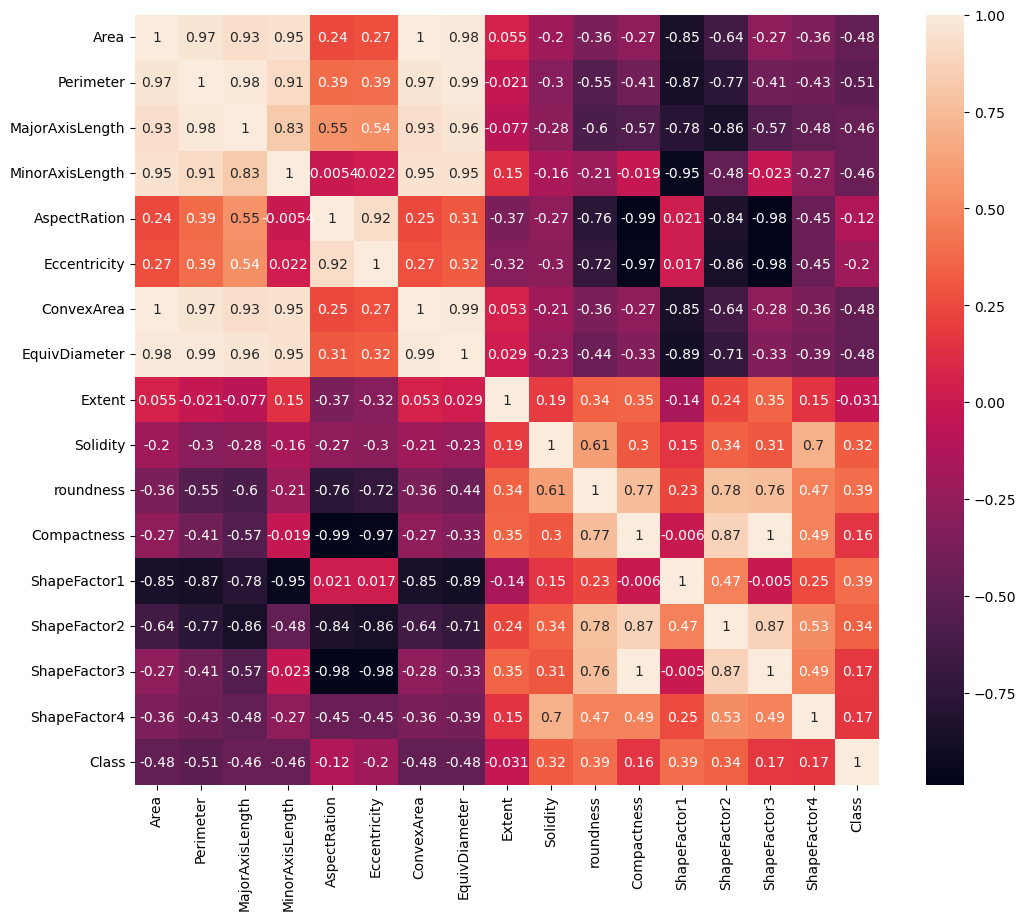

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(ab.corr(),annot=True)
plt.show()

## Outliers Detection 

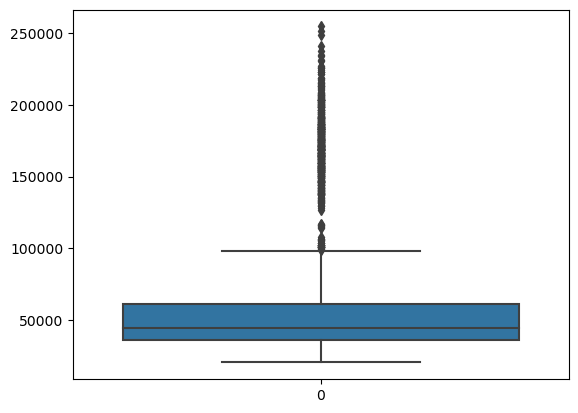

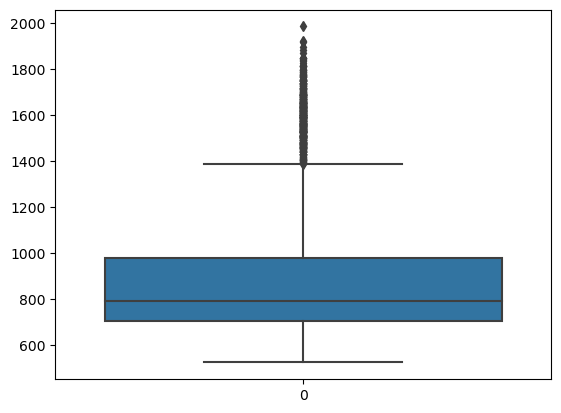

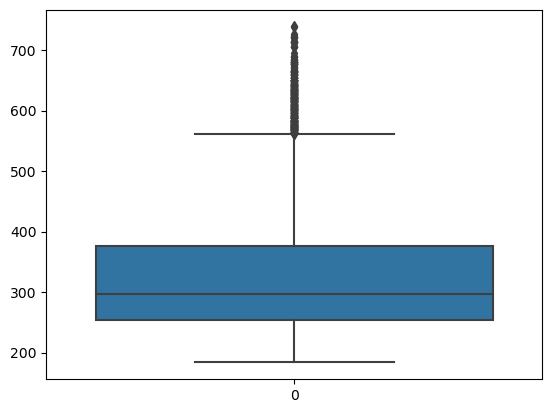

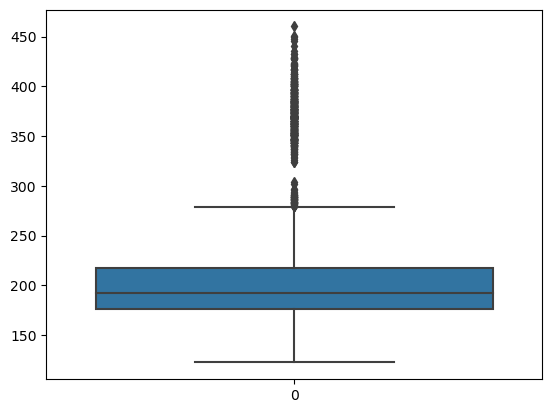

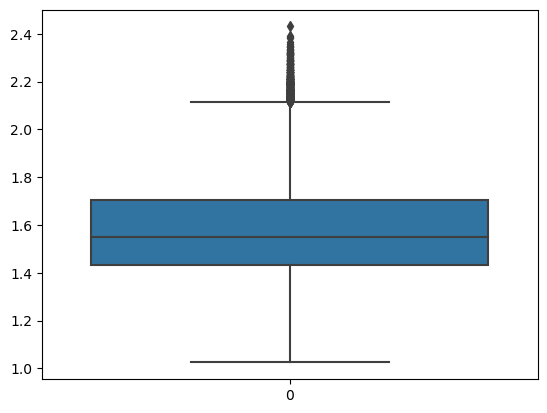

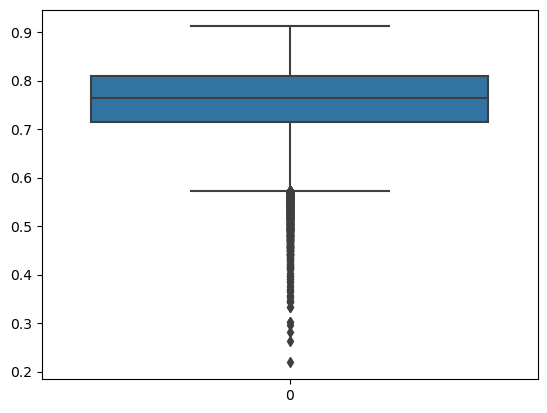

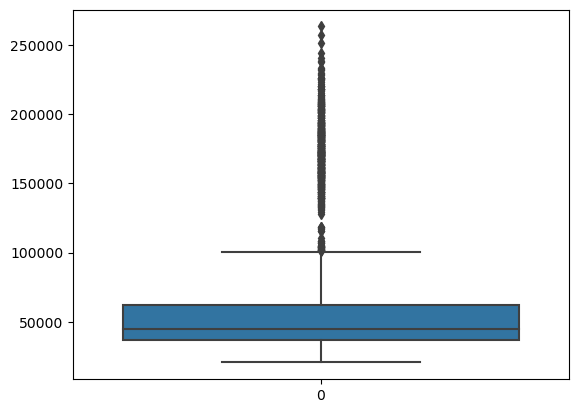

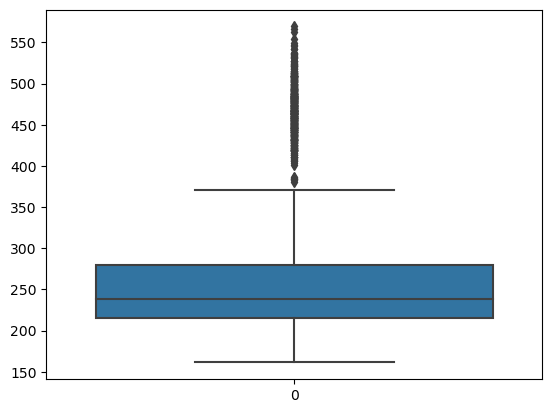

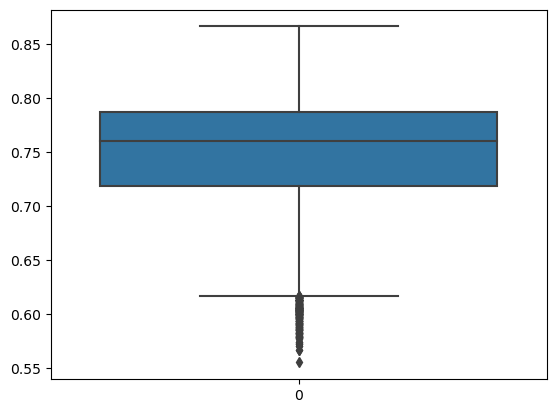

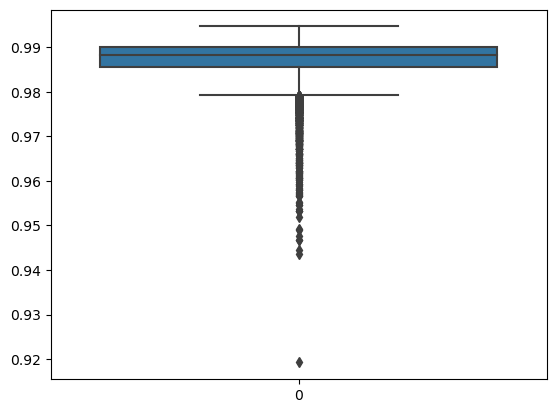

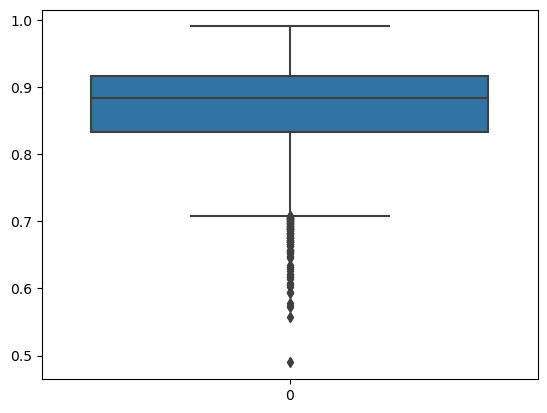

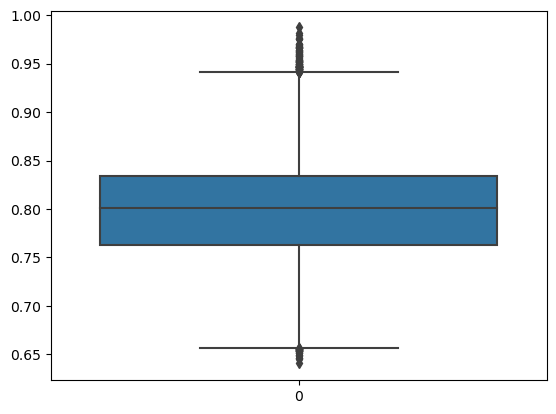

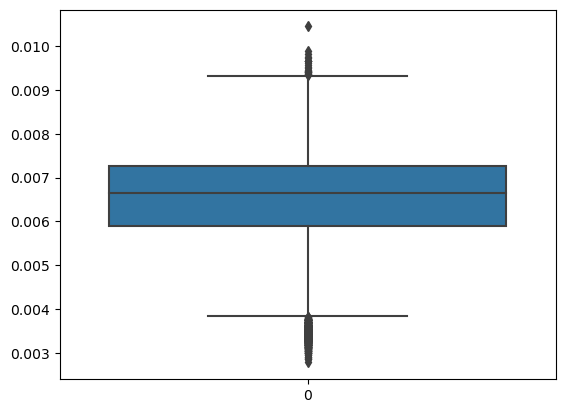

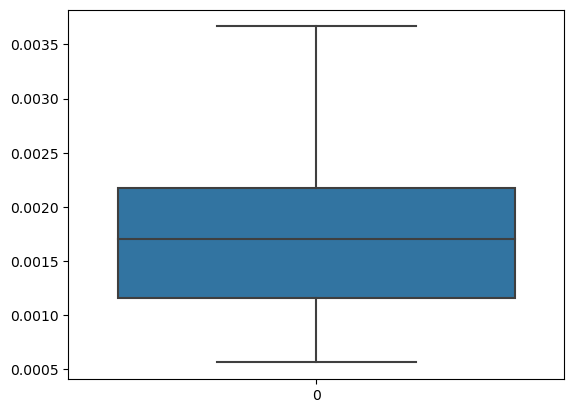

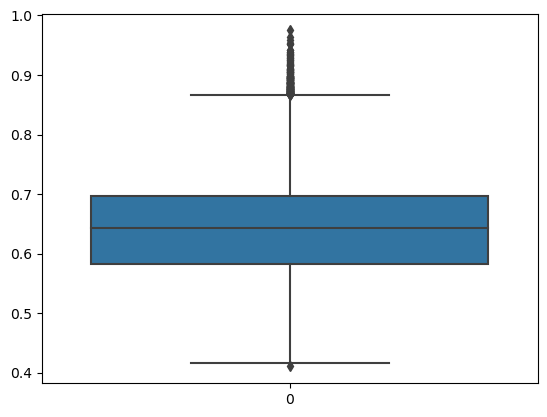

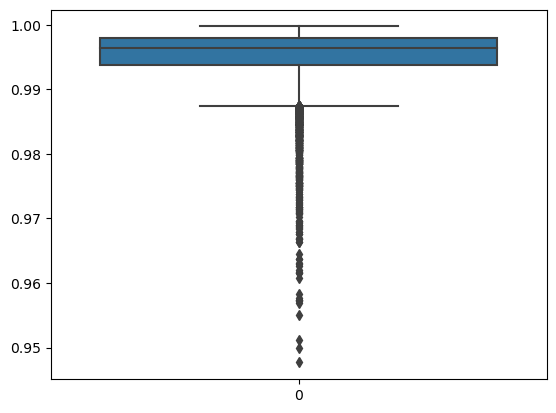

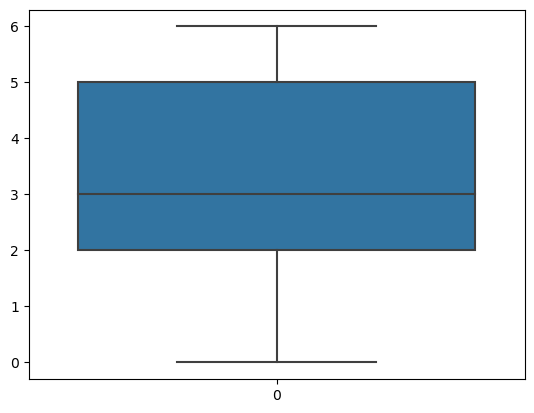

In [17]:
for i in ab.columns:
    sns.boxplot(ab[i])
    plt.show()

### Outliers Removing

In [18]:
for i in ab.columns:
    Q1=np.quantile(ab[i],0.25)
    Q2=np.quantile(ab[i],0.50)
    Q3=np.quantile(ab[i],0.75)
    Q4=np.quantile(ab[i],1.0)
    IQR=Q3-Q1
    print("IQR=",IQR)
    Lower_Fence=Q1-(1.5*IQR)
    Upper_Fence=Q3+(1.5*IQR)
    print("Lower_Fence=", i +" = "+ str( Lower_Fence ))
    print("Upper_Fence=", i +" = "+str( Upper_Fence ))
    print()

IQR= 25099.5
Lower_Fence= Area = -1366.75
Upper_Fence= Area = 99031.25

IQR= 273.9164999999999
Lower_Fence= Perimeter = 292.3552500000001
Upper_Fence= Perimeter = 1388.0212499999998

IQR= 123.22568242046248
Lower_Fence= MajorAxisLength = 68.24828273067908
Upper_Fence= MajorAxisLength = 561.151012412529

IQR= 41.35904641301232
Lower_Fence= MinorAxisLength = 113.84778744577955
Upper_Fence= MinorAxisLength = 279.28397309782883

IQR= 0.2732542047555564
Lower_Fence= AspectRation = 1.0207802776767525
Upper_Fence= AspectRation = 2.113797096698978

IQR= 0.0945275786626778
Lower_Fence= Eccentricity = 0.5733524682314981
Upper_Fence= Eccentricity = 0.9514627828822093

IQR= 25687.0
Lower_Fence= ConvexArea = -1857.5
Upper_Fence= ConvexArea = 100890.5

IQR= 64.62707346184635
Lower_Fence= EquivDiameter = 117.9926669054926
Upper_Fence= EquivDiameter = 376.500960752878

IQR= 0.0681136547460438
Lower_Fence= Extent = 0.6165646627040451
Upper_Fence= Extent = 0.8890192816882203

IQR= 0.004340454790551451
L

<Axes: >

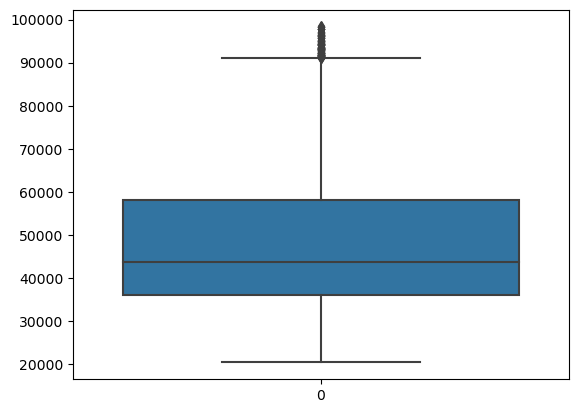

In [19]:
df=ab.loc[(ab["Area"]>=-1366.75) & (ab["Area"]<=99031.25)]
sns.boxplot(df["Area"])

<Axes: xlabel='Perimeter'>

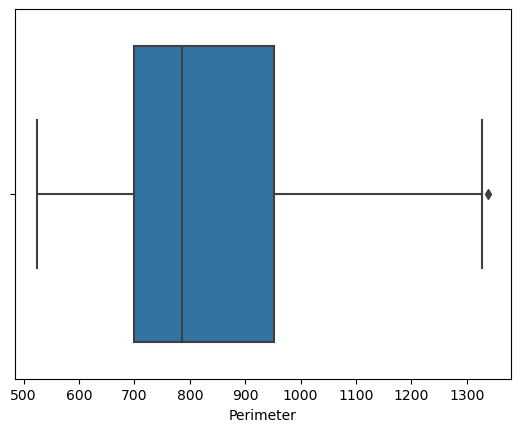

In [20]:
aa=df.loc[(df["Perimeter"]>=292.3552500000001) & (df["Perimeter"]<=1388.0212499999998)]
sns.boxplot(data=aa,x="Perimeter")

<Axes: xlabel='MajorAxisLength'>

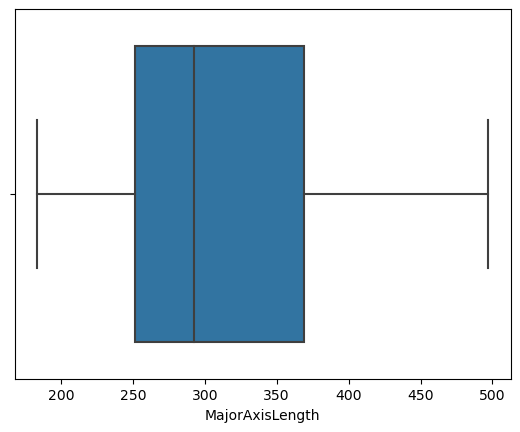

In [21]:
bb=aa.loc[(aa["MajorAxisLength"]>=68.24828273067908) & (aa["MajorAxisLength"]<=561.151012412529)]
sns.boxplot(data=bb,x="MajorAxisLength")

<Axes: xlabel='MinorAxisLength'>

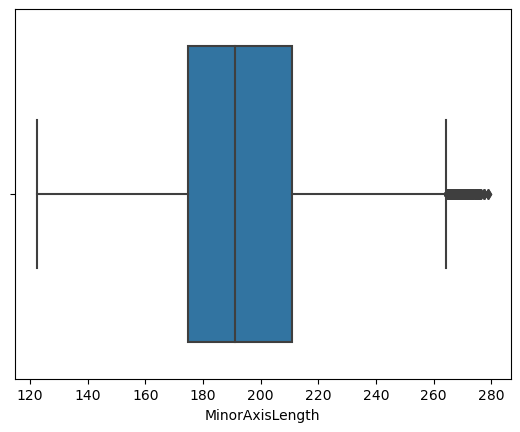

In [22]:
cc=bb.loc[(bb["MinorAxisLength"]>=113.84778744577955) & (bb["MinorAxisLength"]<=279.28397309782883)]
sns.boxplot(data=cc,x="MinorAxisLength")

<Axes: xlabel='MinorAxisLength'>

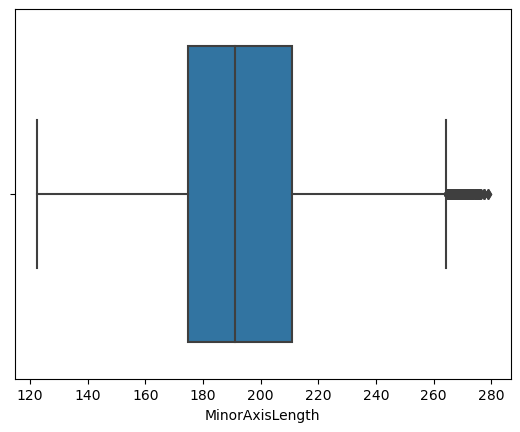

In [23]:
dd=cc.loc[(cc["MinorAxisLength"]>=113.84778744577955) & (cc["MinorAxisLength"]<=279.28397309782883)]
sns.boxplot(data=dd,x="MinorAxisLength")

<Axes: xlabel='AspectRation'>

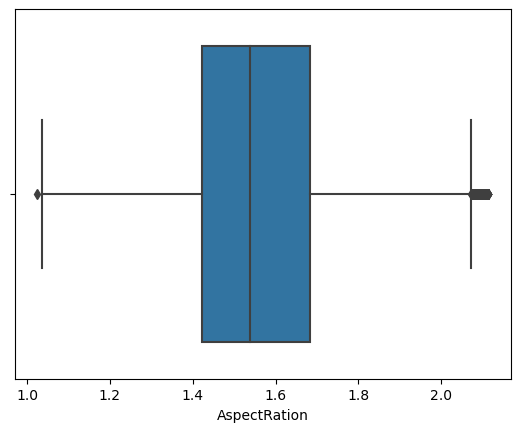

In [24]:
ee=dd.loc[(dd["AspectRation"]>=1.0207802776767525) & (dd["AspectRation"]<=2.113797096698978)]
sns.boxplot(data=ee,x="AspectRation")

<Axes: xlabel='Eccentricity'>

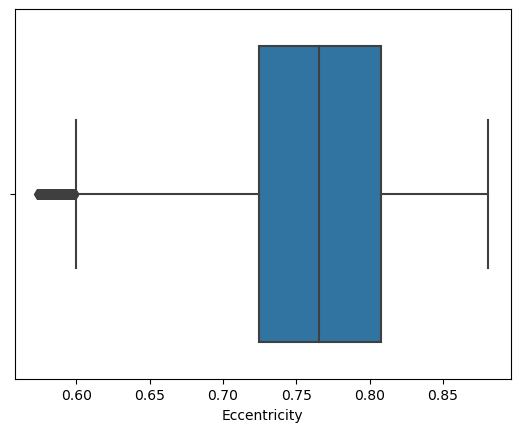

In [25]:
ff=ee.loc[(ee["Eccentricity"]>=0.5733524682314981) & (ee["Eccentricity"]<=0.9514627828822093)]
sns.boxplot(data=ff,x="Eccentricity")

<Axes: xlabel='ConvexArea'>

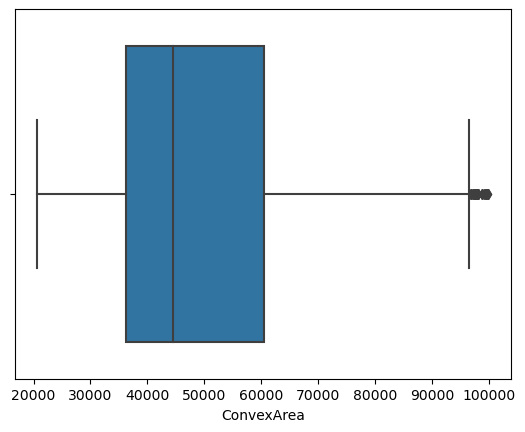

In [26]:
gg=ff.loc[(ff["ConvexArea"]>=-1857.5) & (ff["ConvexArea"]<=100890.5)]
sns.boxplot(data=gg,x="ConvexArea")

<Axes: xlabel='EquivDiameter'>

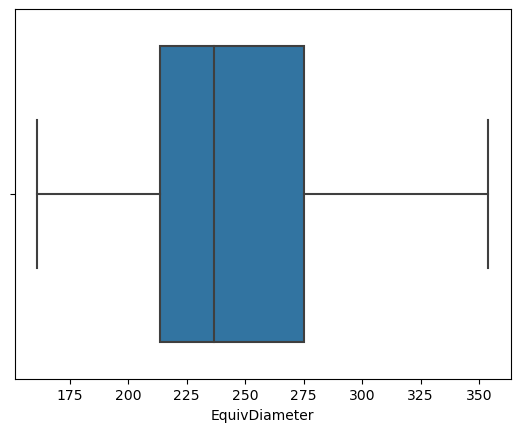

In [27]:
hh=gg.loc[(gg["EquivDiameter"]>=117.9926669054926) & (gg["EquivDiameter"]<=376.500960752878)]
sns.boxplot(data=hh,x="EquivDiameter")

<Axes: xlabel='Extent'>

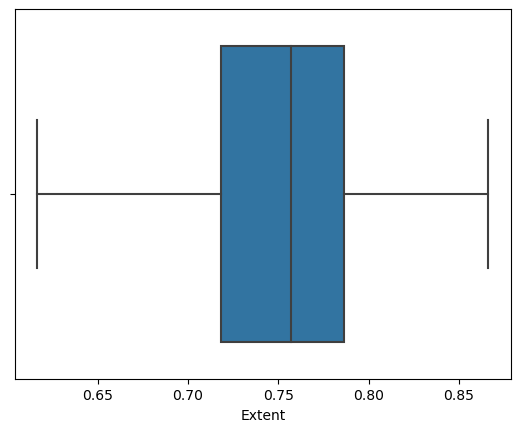

In [28]:
ii=hh.loc[(hh["Extent"]>=0.6165646627040451) & (hh["Extent"]<=0.8890192816882203)]
sns.boxplot(data=ii,x="Extent")

<Axes: xlabel='Solidity'>

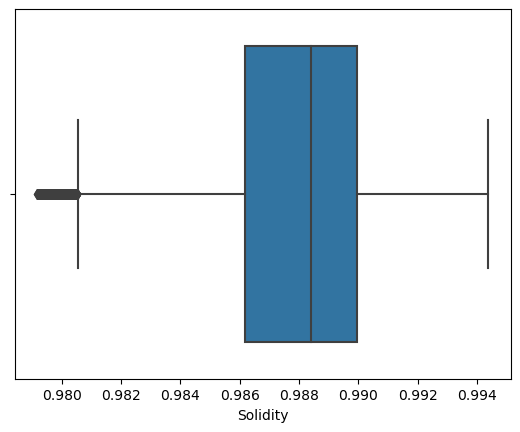

In [29]:
jj=ii.loc[(ii["Solidity"]>=0.9791675892033775) & (ii["Solidity"]<=0.9965294083655833)]
sns.boxplot(data=jj,x="Solidity")

<Axes: xlabel='roundness'>

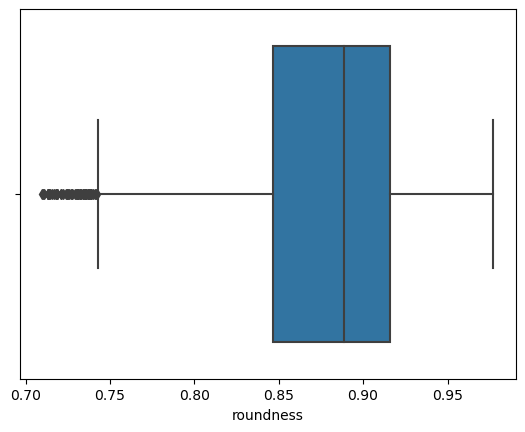

In [30]:
kk=jj.loc[(jj["roundness"]>=0.7079773536884039) & (jj["roundness"]<=1.0424631477470467)]
sns.boxplot(data=kk,x="roundness")

<Axes: xlabel='Compactness'>

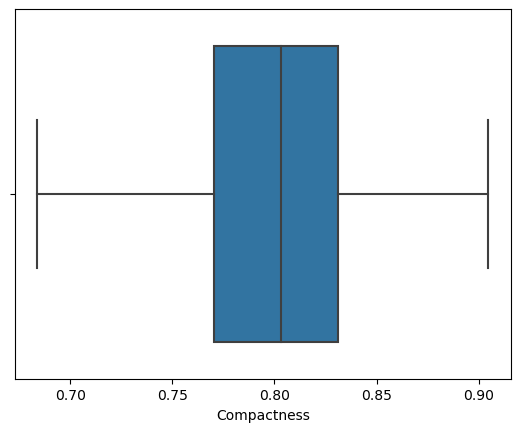

In [31]:
ll=kk.loc[(kk["Compactness"]>=0.6563650544031288) & (kk["Compactness"]<=0.9413333019264831)]
sns.boxplot(data=ll,x="Compactness")

<Axes: xlabel='ShapeFactor1'>

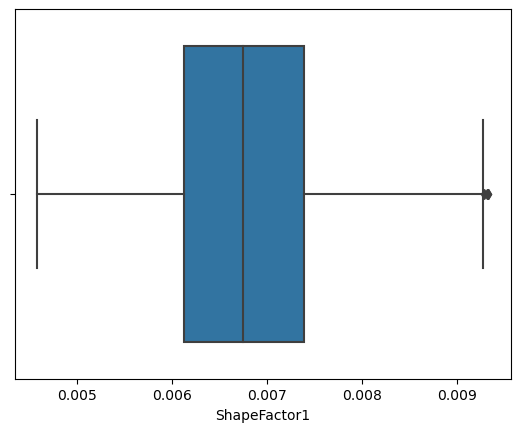

In [32]:
mm=ll.loc[(ll["ShapeFactor1"]>=0.0038272042964401063) & (ll["ShapeFactor1"]<=0.009336230132331147)]
sns.boxplot(data=mm,x="ShapeFactor1")

<Axes: xlabel='ShapeFactor2'>

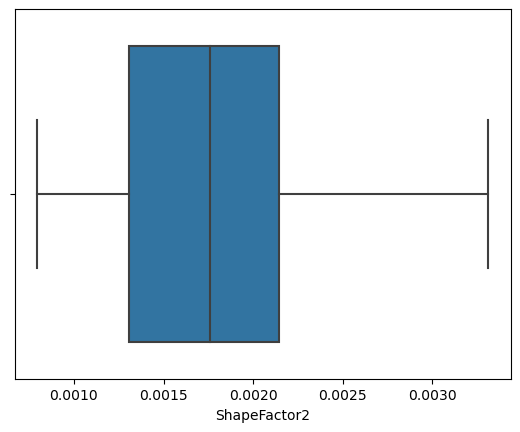

In [33]:
nn=mm.loc[(mm["ShapeFactor2"]>=-0.0003630922979562278) & (mm["ShapeFactor2"]<=0.0036943296814940883)]
sns.boxplot(data=nn,x="ShapeFactor2")

<Axes: xlabel='ShapeFactor3'>

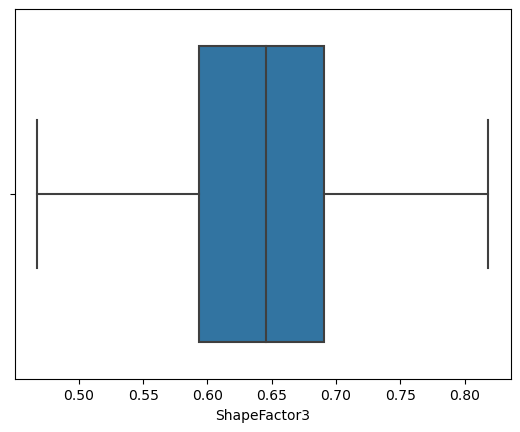

In [34]:
oo=nn.loc[(nn["ShapeFactor3"]>=0.4117822166871669) & (nn["ShapeFactor3"]<=0.86707551816641)]
sns.boxplot(data=oo,x="ShapeFactor3")

<Axes: xlabel='ShapeFactor4'>

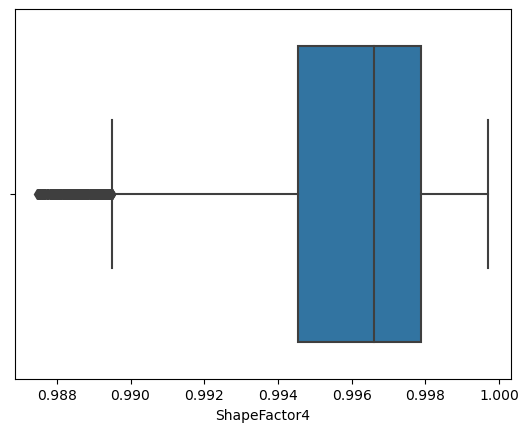

In [35]:
pp=oo.loc[(oo["ShapeFactor4"]>=0.987462710833513) & (oo["ShapeFactor4"]<=1.0041485609633594)]
sns.boxplot(data=pp,x="ShapeFactor4")

In [36]:
pp

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
23,31637,656.711,229.719255,175.510446,1.308864,0.645191,32045,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091,5
24,31675,657.431,236.752632,171.210559,1.382816,0.690678,32009,200.822963,0.740936,0.989565,0.920929,0.848240,0.007474,0.002387,0.719510,0.994950,5
29,31811,642.092,223.984683,180.917123,1.238051,0.589565,32052,201.253629,0.773877,0.992481,0.969600,0.898515,0.007041,0.002831,0.807329,0.999515,5
31,31823,662.532,222.872689,181.894696,1.225284,0.577858,32274,201.291585,0.774848,0.986026,0.911040,0.903168,0.007004,0.002875,0.815713,0.999481,5
32,31837,656.404,224.912554,180.439422,1.246471,0.596968,32238,201.335857,0.785246,0.987561,0.928538,0.895174,0.007065,0.002798,0.801336,0.998843,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


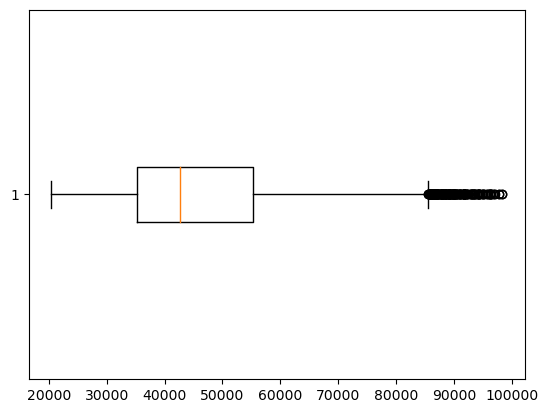

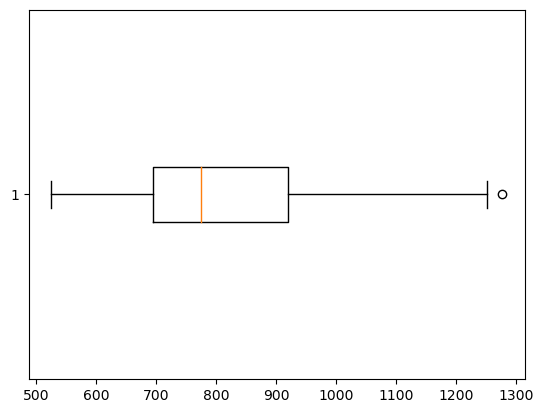

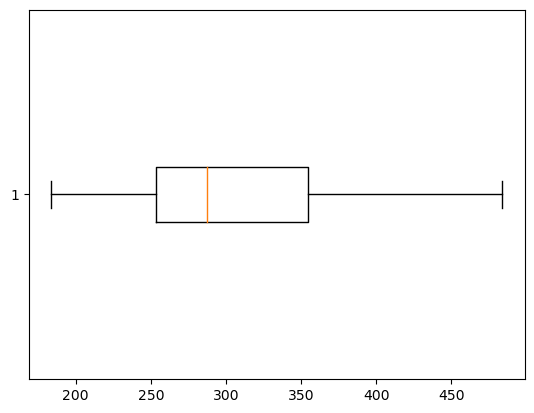

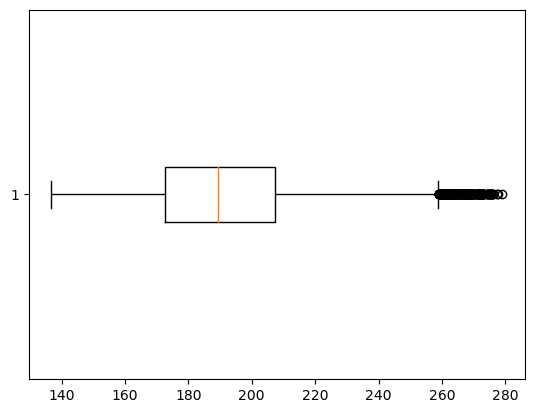

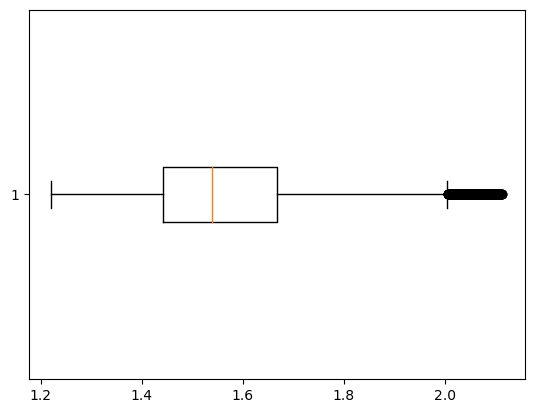

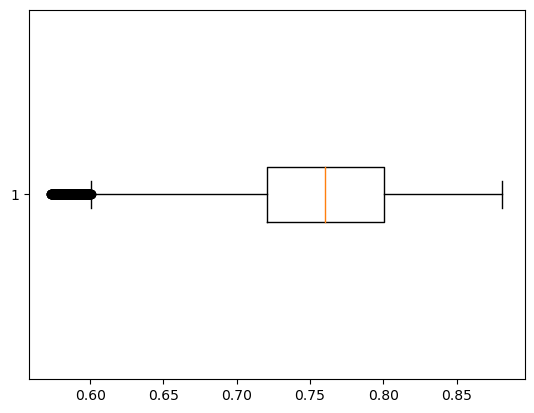

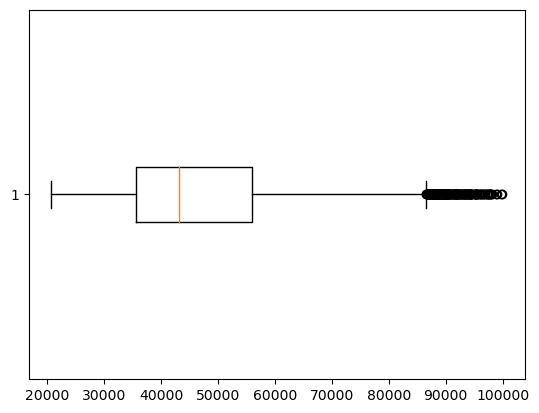

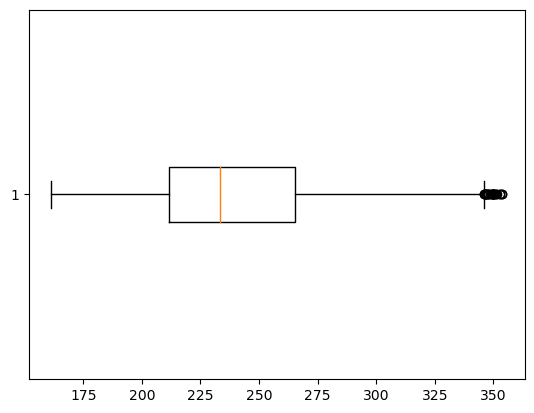

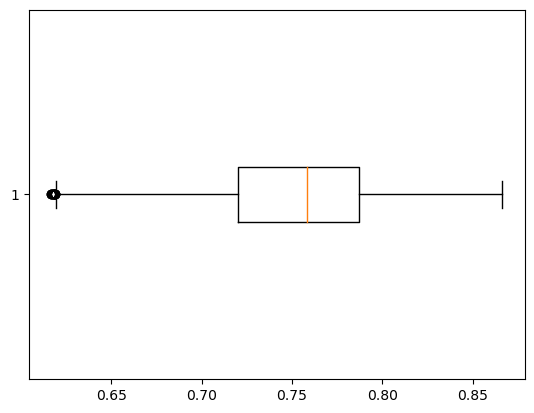

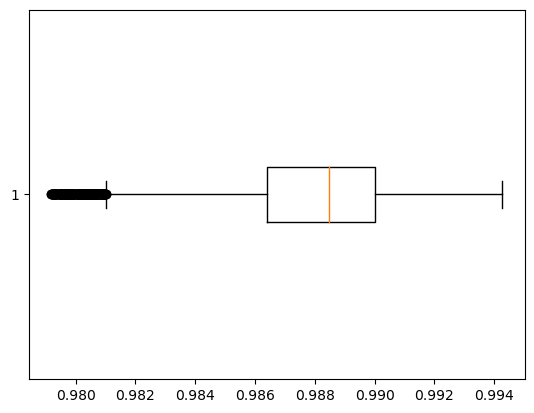

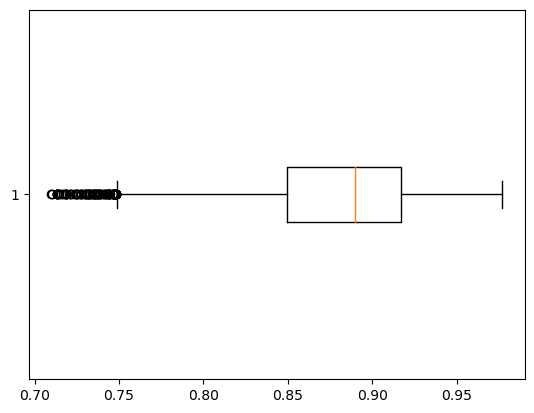

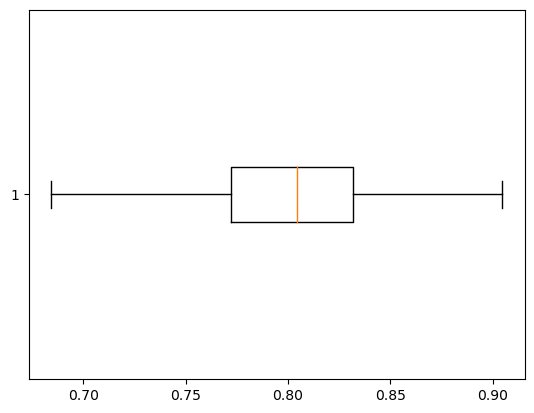

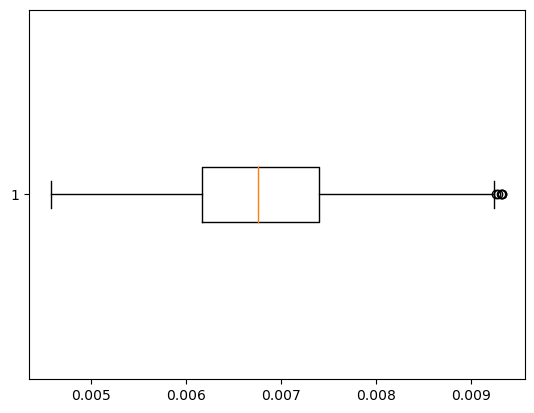

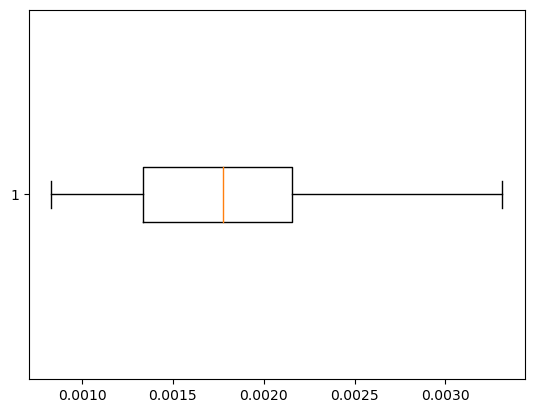

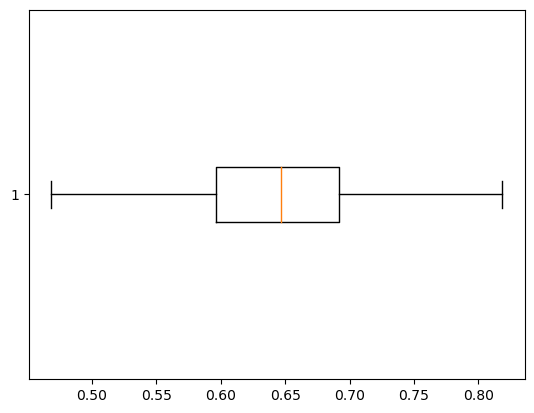

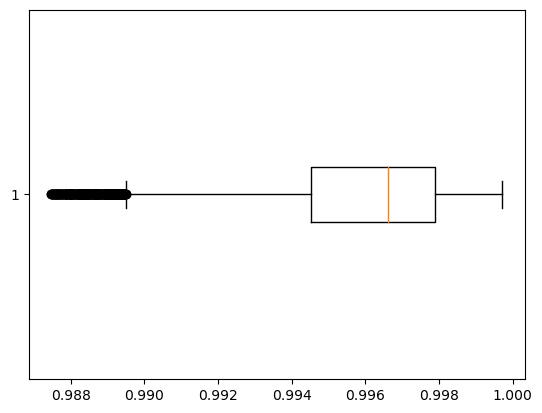

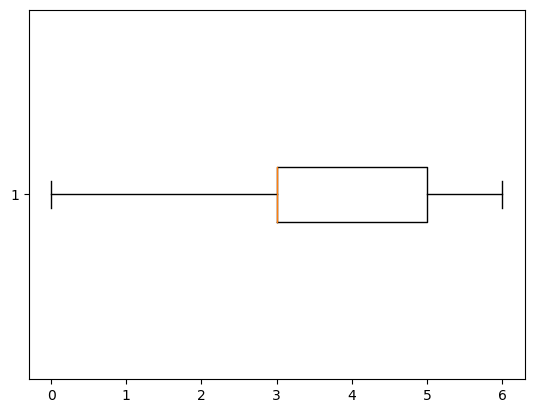

In [37]:
for i in pp.columns:
    plt.boxplot(pp[i],vert=False)
    plt.show()

In [38]:
pp

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
23,31637,656.711,229.719255,175.510446,1.308864,0.645191,32045,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091,5
24,31675,657.431,236.752632,171.210559,1.382816,0.690678,32009,200.822963,0.740936,0.989565,0.920929,0.848240,0.007474,0.002387,0.719510,0.994950,5
29,31811,642.092,223.984683,180.917123,1.238051,0.589565,32052,201.253629,0.773877,0.992481,0.969600,0.898515,0.007041,0.002831,0.807329,0.999515,5
31,31823,662.532,222.872689,181.894696,1.225284,0.577858,32274,201.291585,0.774848,0.986026,0.911040,0.903168,0.007004,0.002875,0.815713,0.999481,5
32,31837,656.404,224.912554,180.439422,1.246471,0.596968,32238,201.335857,0.785246,0.987561,0.928538,0.895174,0.007065,0.002798,0.801336,0.998843,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [39]:
X=pp.drop(["Class"],axis=1)
print(X)
Y=pp["Class"]
print(Y)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
23     31637    656.711       229.719255       175.510446      1.308864   
24     31675    657.431       236.752632       171.210559      1.382816   
29     31811    642.092       223.984683       180.917123      1.238051   
31     31823    662.532       222.872689       181.894696      1.225284   
32     31837    656.404       224.912554       180.439422      1.246471   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
23         0.64519

In [40]:
X.shape,Y.shape

((10539, 16), (10539,))

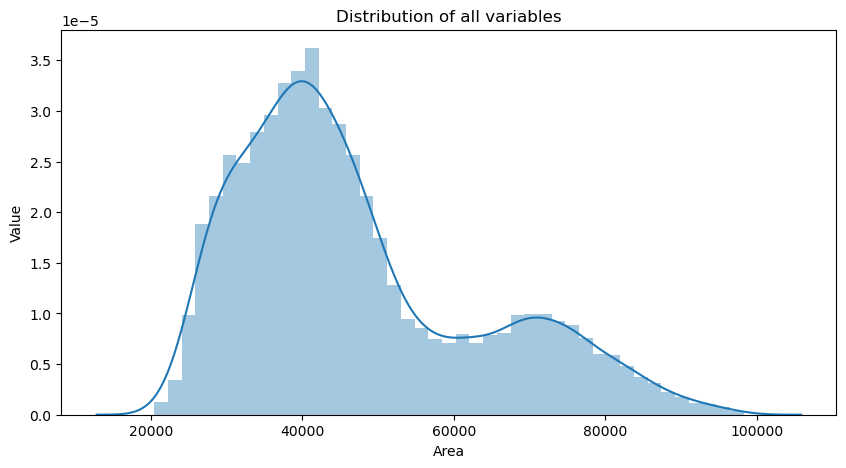

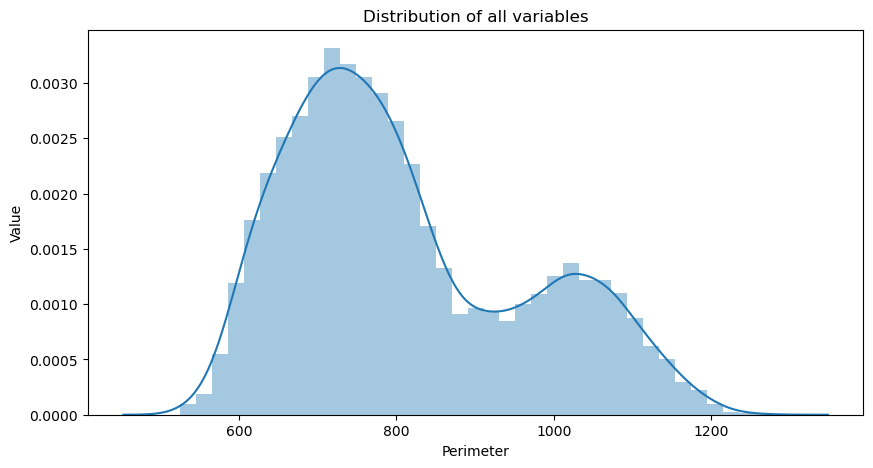

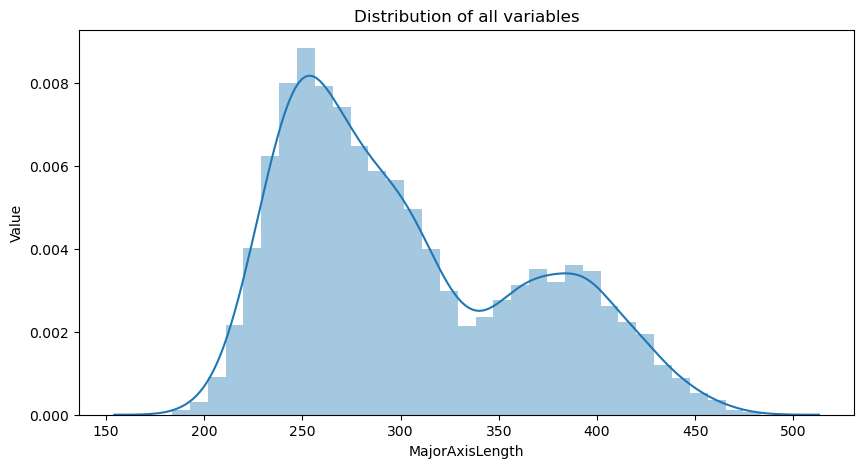

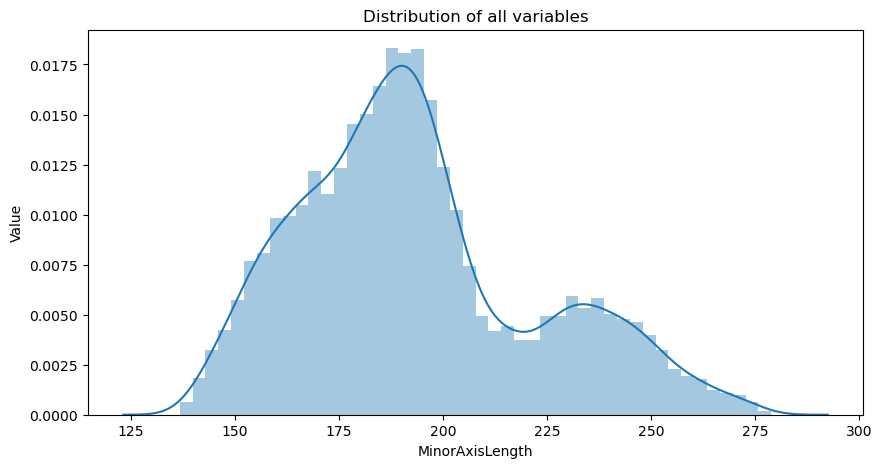

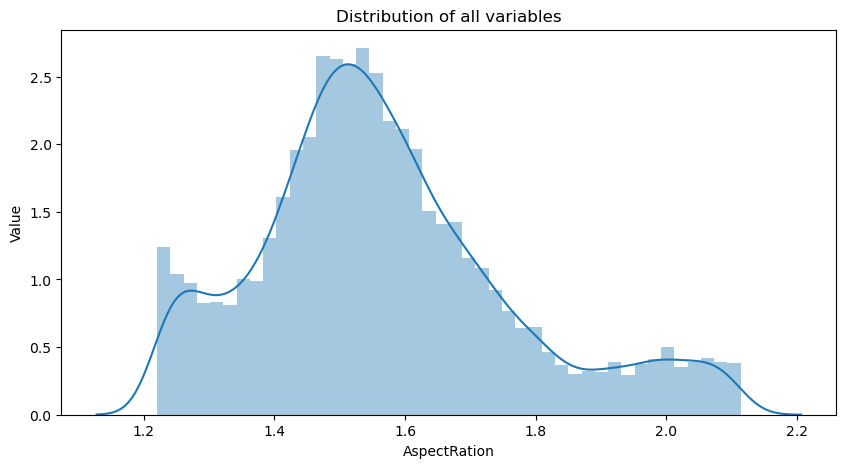

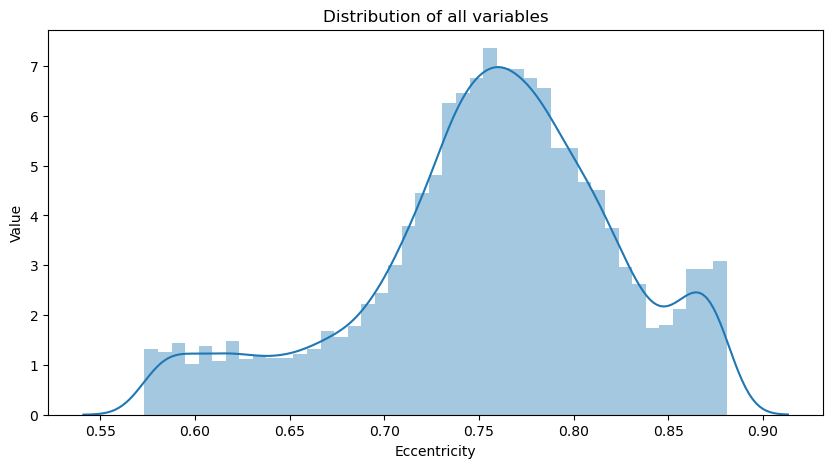

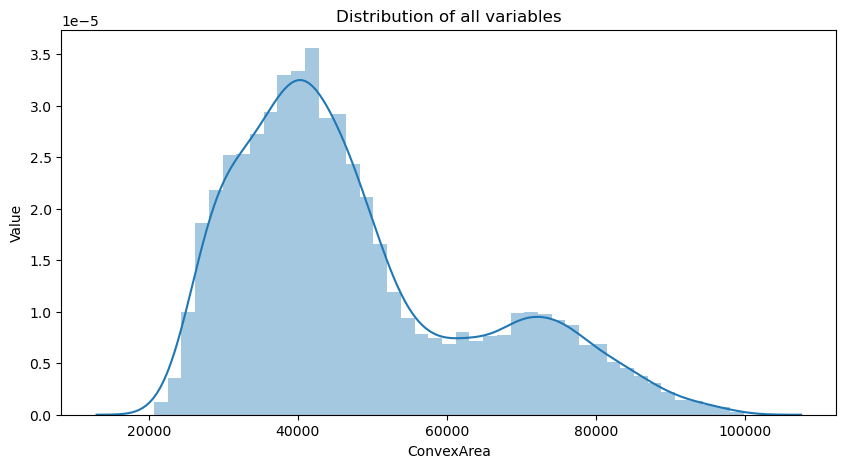

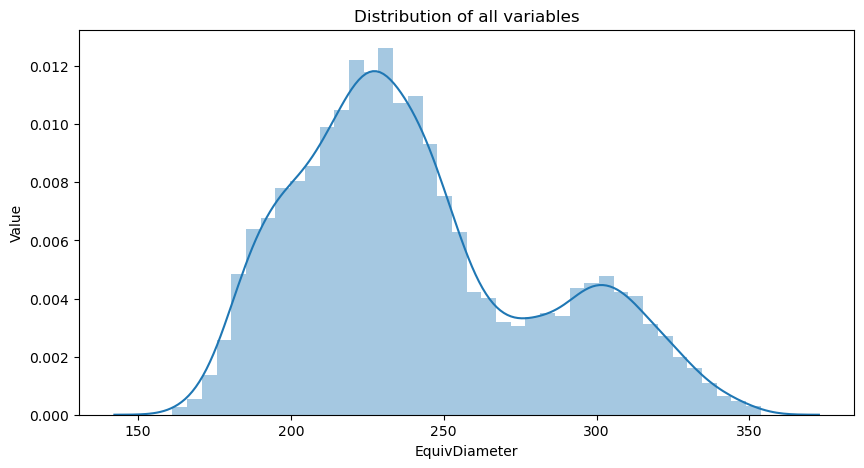

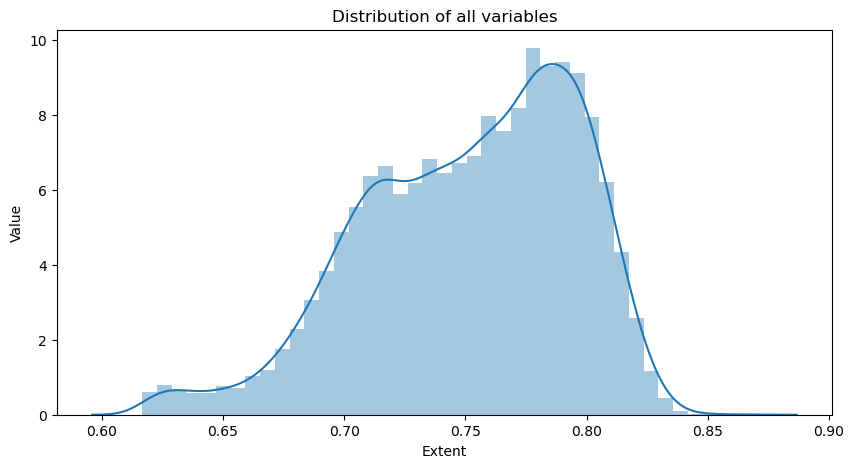

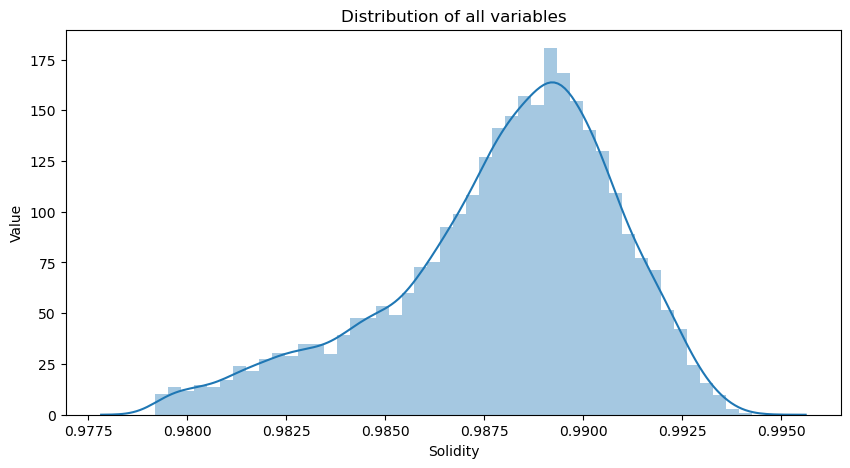

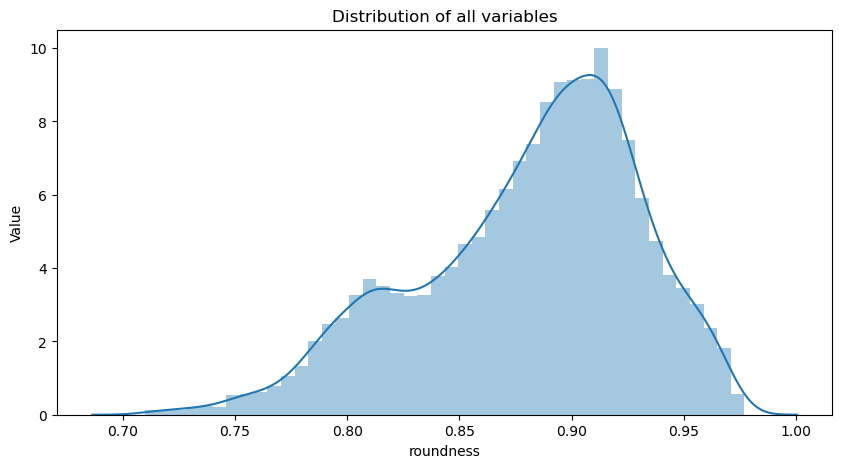

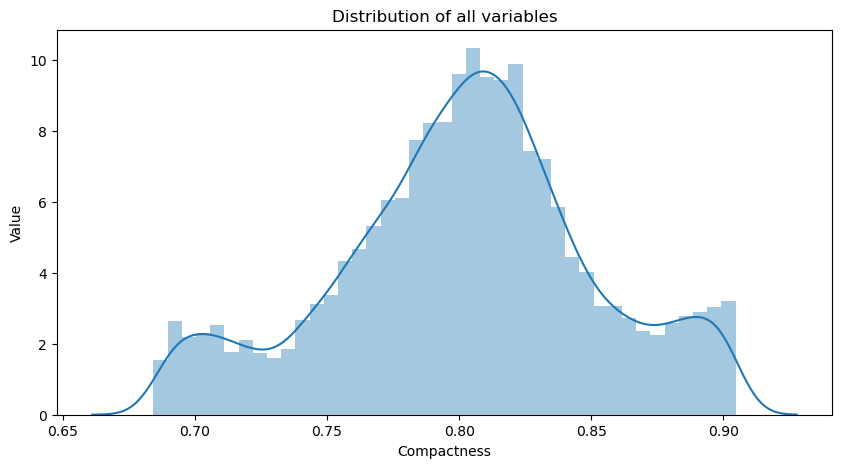

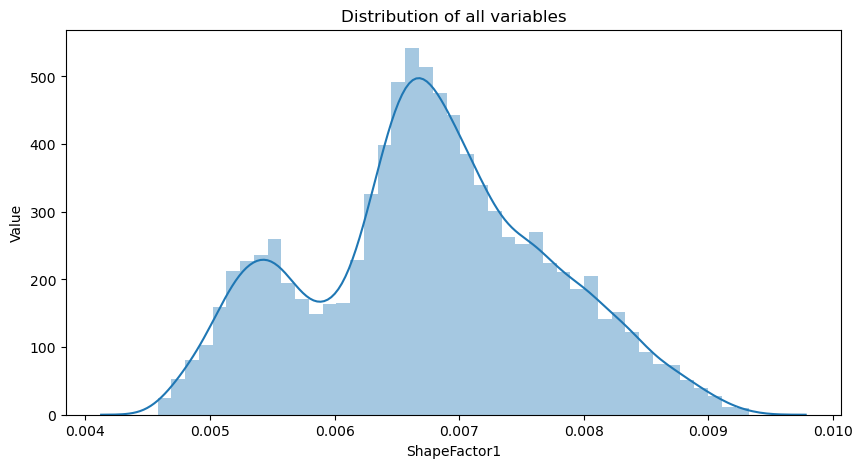

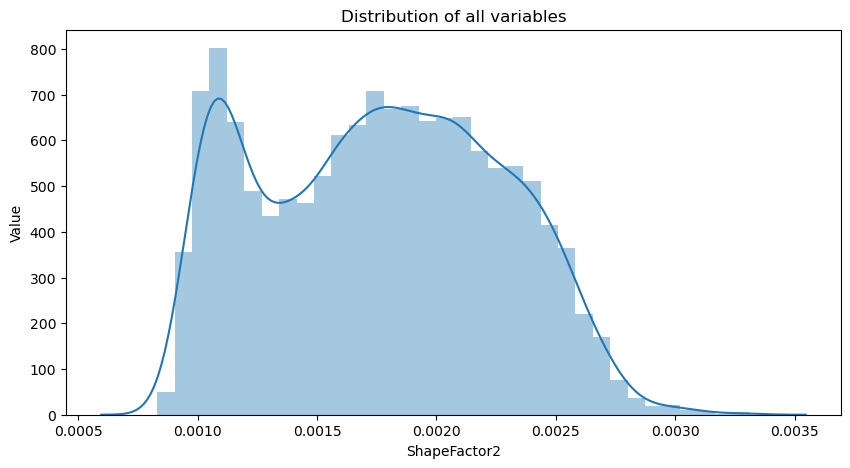

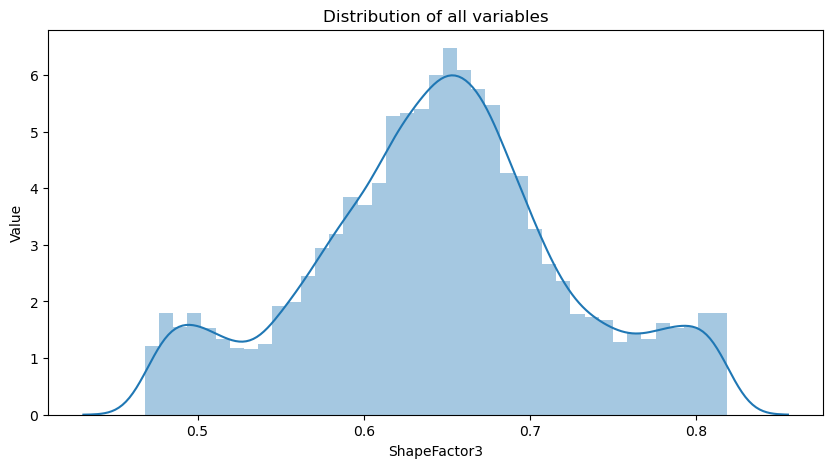

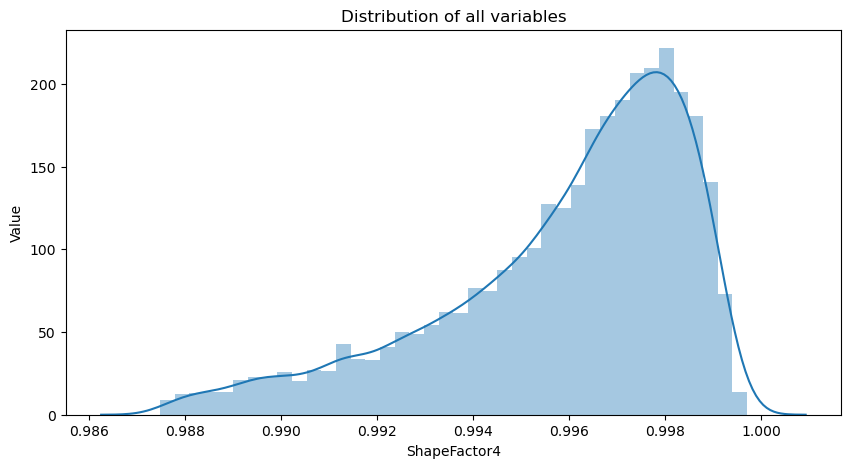

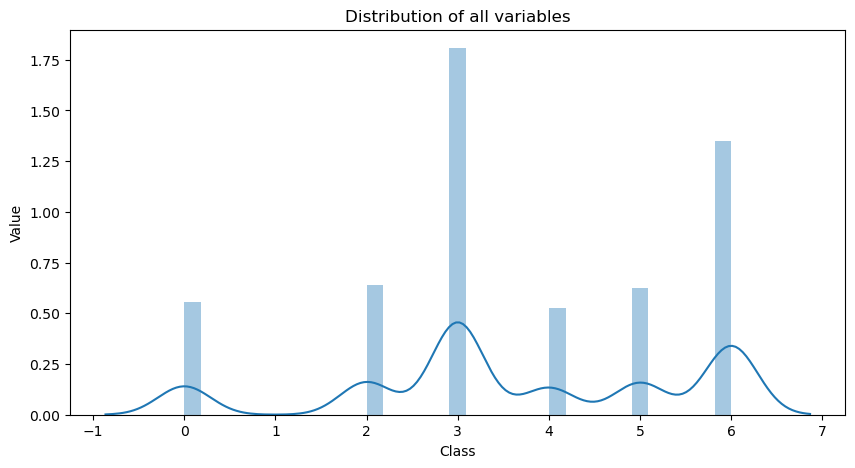

In [41]:
for b in pp.columns:
    plt.figure(figsize=(10,5))
    sns.distplot(pp[b])
    plt.xlabel(b)
    plt.ylabel('Value')
    plt.title('Distribution of all variables')
    plt.show()

## Min Max Scaler

In [42]:
from sklearn.preprocessing import MinMaxScaler
Msc = MinMaxScaler()
X1 = Msc.fit_transform(X)
X1

array([[0.14408478, 0.17562899, 0.15368081, ..., 0.71705857, 0.84268898,
        0.94948931],
       [0.1445729 , 0.17658715, 0.17711837, ..., 0.62726314, 0.71757696,
        0.61111634],
       [0.14631985, 0.1561744 , 0.13457131, ..., 0.80613857, 0.96833193,
        0.98416307],
       ...,
       [0.27898523, 0.31217978, 0.32636454, ..., 0.42638228, 0.5958635 ,
        0.75959733],
       [0.27908799, 0.31811238, 0.33250505, ..., 0.41178001, 0.57117182,
        0.63335485],
       [0.27924213, 0.32936807, 0.37169363, ..., 0.32628434, 0.42264709,
        0.87501327]])

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,train_size=0.8,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8431, 16), (2108, 16), (8431,), (2108,))

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
y_pred

array([6, 3, 3, ..., 0, 3, 3])

In [45]:
y_pre = lg.predict(x_test)
y_pre

array([6, 3, 3, ..., 0, 3, 3])

In [46]:
lg.score(x_test,y_test)

0.9136622390891841

In [47]:
lg.score(x_train,y_train)

0.9098564820306013

## Confusion Metrix

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve

<Axes: >

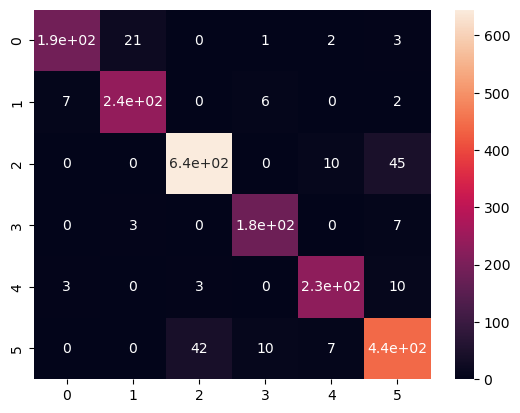

In [49]:
CM = confusion_matrix(y_test,y_pre)
sns.heatmap(CM,annot=True)

In [50]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       215
           2       0.91      0.94      0.92       254
           3       0.93      0.92      0.93       700
           4       0.91      0.95      0.93       191
           5       0.92      0.93      0.93       246
           6       0.87      0.88      0.88       502

    accuracy                           0.91      2108
   macro avg       0.92      0.92      0.92      2108
weighted avg       0.91      0.91      0.91      2108



In [51]:
LR = pd.DataFrame({'Actual':y_test,'Predict':y_pre})
LR

,Actual,Predict
9531,6,6
11095,3,3
11100,3,3
10589,3,3
12787,3,3
...,...,...
3970,2,2
6797,4,4
3178,0,0
10655,3,3


## Number of Wrong Prediction

In [52]:
len(LR.loc[LR['Actual']!=LR['Predict']])

182